## EDA + Missing values and Outliers - Detection and Treatment + Model Building

### Step - 1 - Introduction -> Give a detailed data description and objective

- Introduction - The dataset has 14 input variables that is  categorical and numerical data types. The dataset contains missing values which is question mark character (?). it is a binary classification task i.e. two classes ‘>50K‘ and ‘<=50K‘.


### Step - 2 -> Import the data and perform basic pandas operations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adult.csv')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# To display of rows and columns to max so can all the rows and columns be displayed

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [4]:
## Dimensionality check

df.shape

(48842, 15)

In [5]:
## Column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
## Checking null values

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.isin(['?']).sum() 

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df.isin([-1, 0]).sum()

age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain       44807
capital-loss       46560
hours-per-week         0
native-country         0
income                 0
dtype: int64

In [9]:
## Statistical Analysis

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [11]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


## Step - 3 - Univariate Analysis --> PDF, Histograms, Boxplots, Countplots, etc..
- Understand the probability and frequency distribution of each numerical column
- Understand the frequency distribution of each categorical Variable/Column
- Mention observations after each plot

## Univariate Analysis of Numericals Columns

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

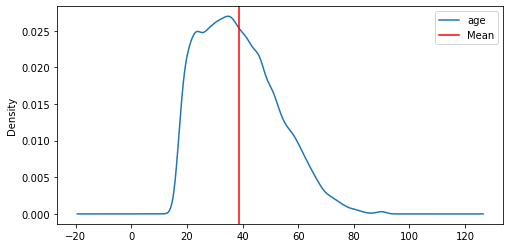

In [13]:
df['age'].plot(kind="kde", figsize=(8,4))
plt.axvline(df['age'].mean(), color='red', label='Mean')
plt.legend()

In [14]:
import scipy.stats as stats

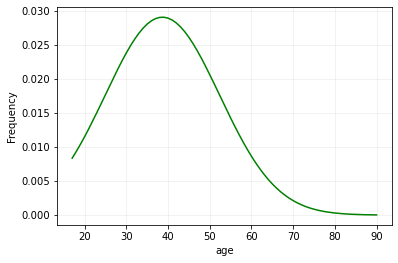

In [15]:
pdf = stats.norm.pdf(df['age'].sort_values(), np.mean(df['age']), np.std(df['age']))
plt.plot(df['age'].sort_values(), pdf, color = 'g')
plt.xlabel("age")    
plt.ylabel("Frequency")
plt.grid(True, alpha=0.2)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

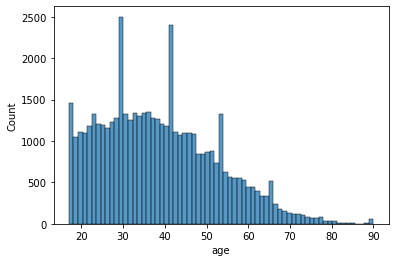

In [16]:
sns.histplot(df['age'])

<AxesSubplot:>

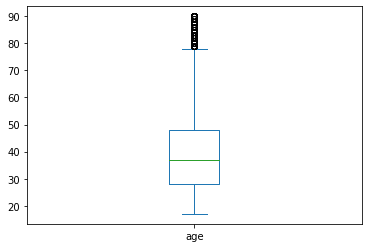

In [17]:
df['age'].plot.box()

<AxesSubplot:xlabel='age', ylabel='count'>

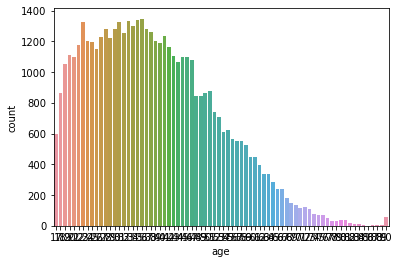

In [18]:
sns.countplot(x = 'age', data = df)

### Observation -  As per the pdf plot of AGE we can see age column is positive skewed and as per the box plot we can there is some outliers

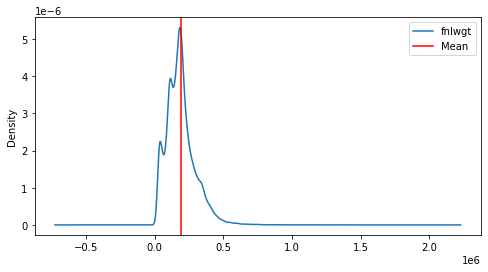

In [19]:
df['fnlwgt'].plot(kind="kde", figsize=(8,4))
plt.axvline(df['fnlwgt'].mean(), color='red', label='Mean')
plt.legend()

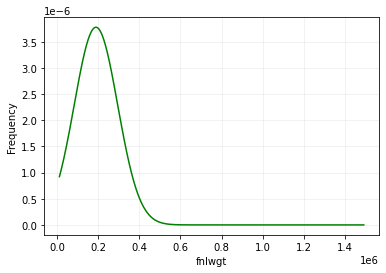

In [20]:
pdf = stats.norm.pdf(df['fnlwgt'].sort_values(), np.mean(df['fnlwgt']), np.std(df['fnlwgt']))
plt.plot(df['fnlwgt'].sort_values(), pdf, color = 'g')
plt.xlabel("fnlwgt")    
plt.ylabel("Frequency")
plt.grid(True, alpha=0.2)
plt.show()

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

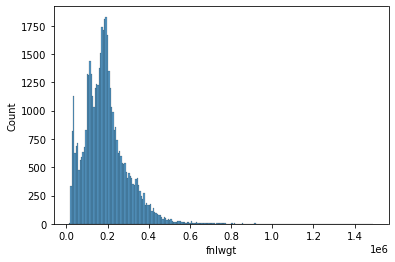

In [21]:
sns.histplot(df['fnlwgt'])

<AxesSubplot:>

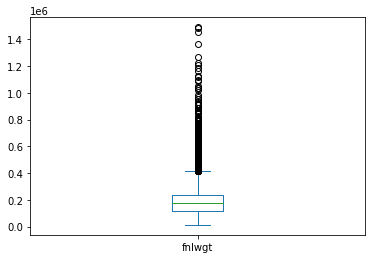

In [22]:
df['fnlwgt'].plot.box()

### Observation - As per the pdf plot of FNLWGT we can see FNLWGT column is positive skewed and as per the box plot we can there is some outliers

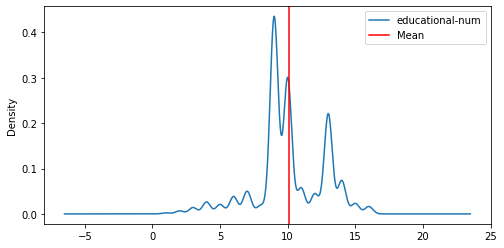

In [23]:
df['educational-num'].plot(kind="kde", figsize=(8,4))
plt.axvline(df['educational-num'].mean(), color='red', label='Mean')
plt.legend()

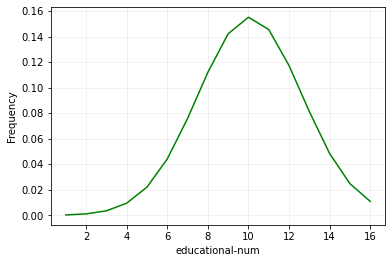

In [24]:
pdf = stats.norm.pdf(df['educational-num'].sort_values(), np.mean(df['educational-num']), np.std(df['educational-num']))
plt.plot(df['educational-num'].sort_values(), pdf, color = 'g')
plt.xlabel("educational-num")    
plt.ylabel("Frequency")
plt.grid(True, alpha=0.2)
plt.show()

<AxesSubplot:ylabel='Frequency'>

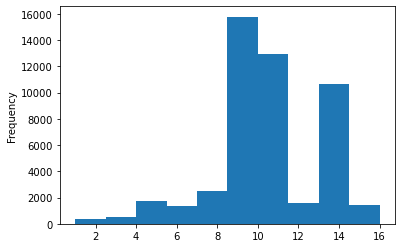

In [25]:
df['educational-num'].plot.hist()

<AxesSubplot:>

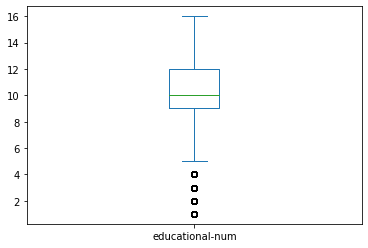

In [26]:
df['educational-num'].plot.box()

<AxesSubplot:xlabel='count', ylabel='educational-num'>

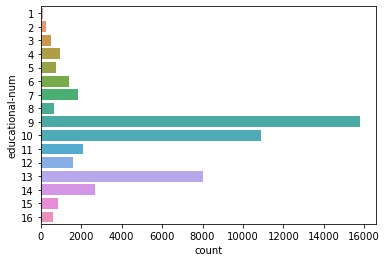

In [27]:
sns.countplot(y = 'educational-num', data = df)

### Observation - As per the above plots it seems educational-num is negative skewed and there is some outliers presents in the column

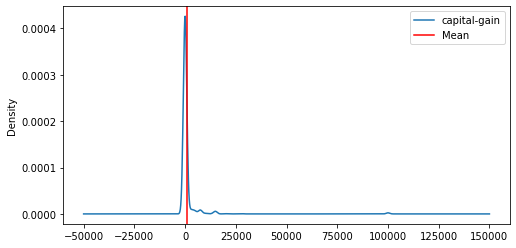

In [28]:
df['capital-gain'].plot(kind="kde", figsize=(8,4))
plt.axvline(df['capital-gain'].mean(), color='red', label='Mean')
plt.legend()

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

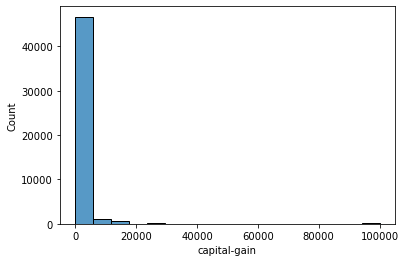

In [29]:
sns.histplot(df['capital-gain'])

<AxesSubplot:>

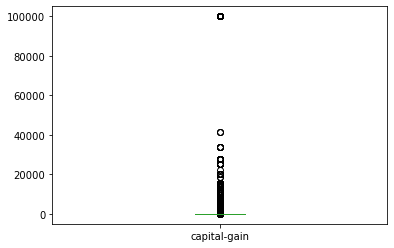

In [30]:
df['capital-gain'].plot.box()

### Observation - As per the above plots it seems capital-gain is positive skewed and there is some outliers presents in the column

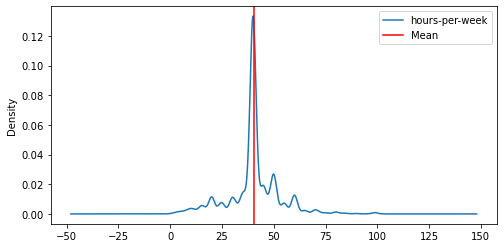

In [31]:
df['hours-per-week'].plot(kind="kde", figsize=(8,4))
plt.axvline(df['hours-per-week'].mean(), color='red', label='Mean')
plt.legend()

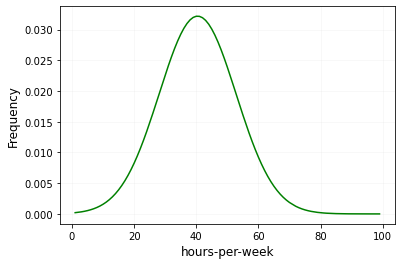

In [32]:
pdf = stats.norm.pdf(df['hours-per-week'].sort_values(), np.mean(df['hours-per-week']), np.std(df['hours-per-week']))
plt.plot(df['hours-per-week'].sort_values(), pdf, color = 'g')
plt.xlabel("hours-per-week", size=12)    
plt.ylabel("Frequency", size=12) 
plt.grid(True, alpha=0.1)
plt.show()

<AxesSubplot:ylabel='Frequency'>

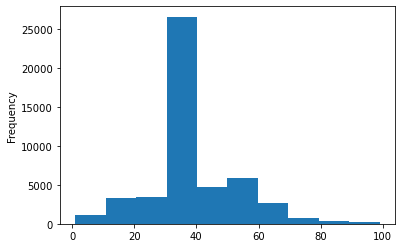

In [33]:
df['hours-per-week'].plot.hist()

<AxesSubplot:>

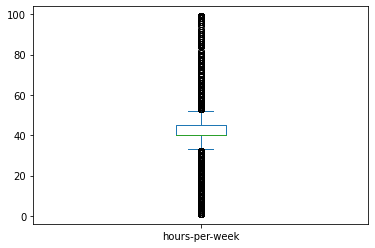

In [34]:
df['hours-per-week'].plot.box()

### Observation - As per the above plots it seems hours-per-week is little positive skewed and there is some outliers presents in the column

## Univariate Analysis of Categorical Columns

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<AxesSubplot:xlabel='count', ylabel='workclass'>

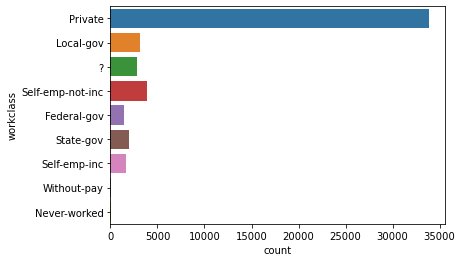

In [36]:
sns.countplot(y= 'workclass', data = df)

### Observation - As per the count plot of workclass it seems most of the peoples work in prive

<AxesSubplot:xlabel='count', ylabel='education'>

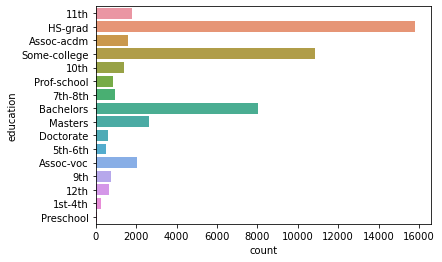

In [37]:
sns.countplot(y= 'education', data = df)

### Observation - As per the count plot of education it seems most of the peoples grduated as HS-grad

<AxesSubplot:xlabel='count', ylabel='marital-status'>

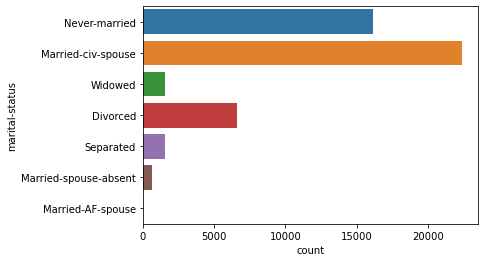

In [38]:
sns.countplot(y= 'marital-status', data = df)

### Observation - As per the count plot of marital-status it seems most of the peoples martial status as Married-civ-spouse

<AxesSubplot:xlabel='count', ylabel='occupation'>

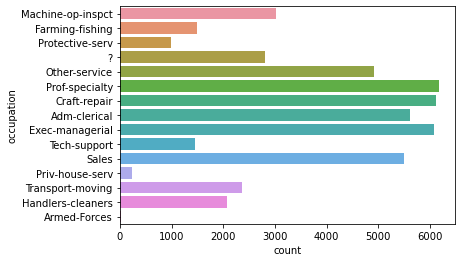

In [39]:
sns.countplot(y= 'occupation', data = df)

### Observation - As per the count plot of occupation it seems most of the peoples have occupation as Prof-speciality

<AxesSubplot:xlabel='count', ylabel='relationship'>

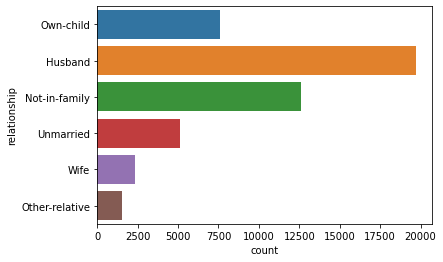

In [40]:
sns.countplot(y= 'relationship', data = df)

### Observation - As per the count plot of relationship it seems most of the peoples have relation as Husband

<AxesSubplot:xlabel='count', ylabel='race'>

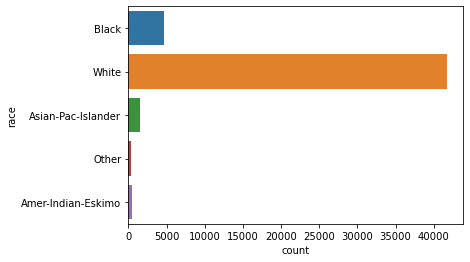

In [41]:
sns.countplot(y= 'race', data = df)

### Observation - As per the count plot of race it seems most of the peoples is white

<AxesSubplot:xlabel='count', ylabel='gender'>

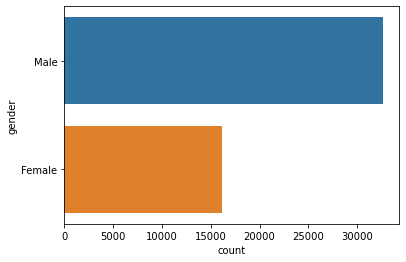

In [42]:
sns.countplot(y= 'gender', data = df)

### Observation - As per the count plot of gender it seems most of the peoples is Male

<AxesSubplot:xlabel='count', ylabel='native-country'>

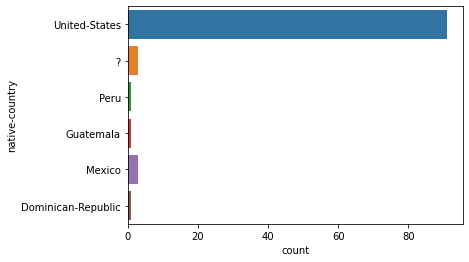

In [43]:
sns.countplot(y= 'native-country', data = df.head(100))

### Observation - As per the count plot of native-country it seems most of the peoples are from United-States

<AxesSubplot:xlabel='count', ylabel='income'>

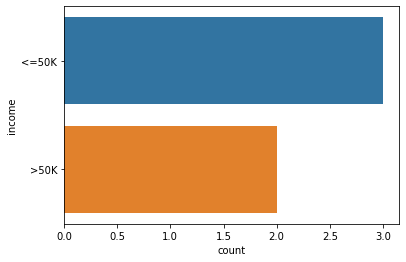

In [44]:
sns.countplot(y= 'income', data = df.head())

### Observation - As per the count plot of income it seems most of the peoples having income less than 50 thousnad

## Step - 4 - Bivariate Analysis
- Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..
- Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..
- Mention observations after each plot.

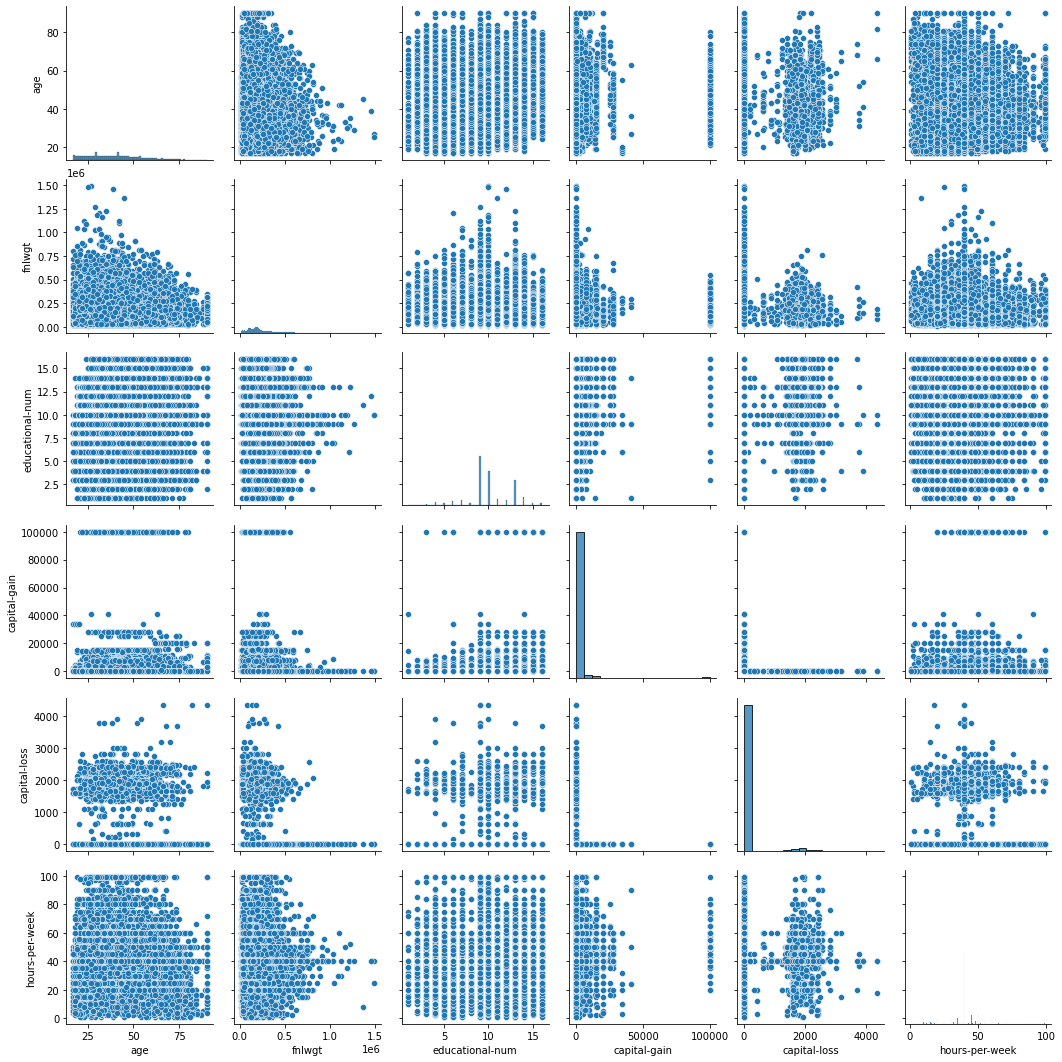

In [45]:
sns.pairplot(df)

### Observation - As per the pair plot of dataset there is no relation of columns between each other

### Bivariate Analysis on Numerical Columns

<AxesSubplot:xlabel='age', ylabel='fnlwgt'>

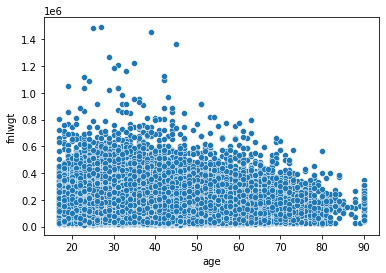

In [46]:
# Scatter Plot

sns.scatterplot(x = df['age'], y = df['fnlwgt'], data = df)

### Observation - As per the scatter plot there is no relation between age and fnlwgt

<AxesSubplot:xlabel='age', ylabel='educational-num'>

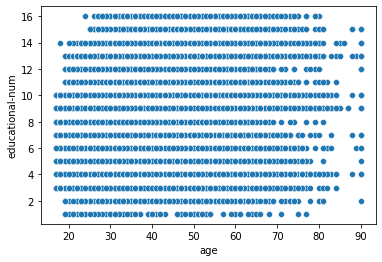

In [47]:
# Scatter Plot

sns.scatterplot(x = df['age'], y = df['educational-num'], data = df)

### Observation - As per the scatter plot there is no relation between age and educational-num

<AxesSubplot:xlabel='age', ylabel='capital-gain'>

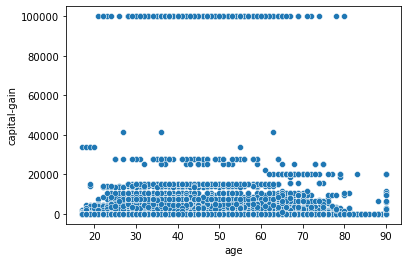

In [48]:
# Scatter Plot

sns.scatterplot(x = df['age'], y = df['capital-gain'], data = df)

### Observation - As per the scatter plot there is no relation between age and capital-gain

<AxesSubplot:xlabel='age', ylabel='capital-loss'>

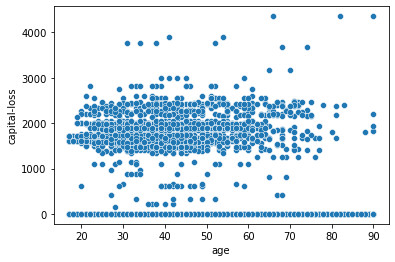

In [49]:
# Scatter Plot

sns.scatterplot(x = df['age'], y = df['capital-loss'], data = df)

### Observation - As per the scatter plot there is no relation between age and capital-loss

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

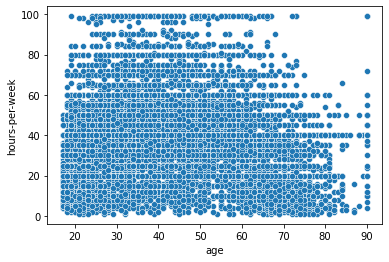

In [50]:
# Scatter Plot

sns.scatterplot(x = df['age'], y = df['hours-per-week'], data = df)

### Observation - As per the scatter plot there is no relation between age and hours-per-week

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Bivariate Analysis of categorical columns

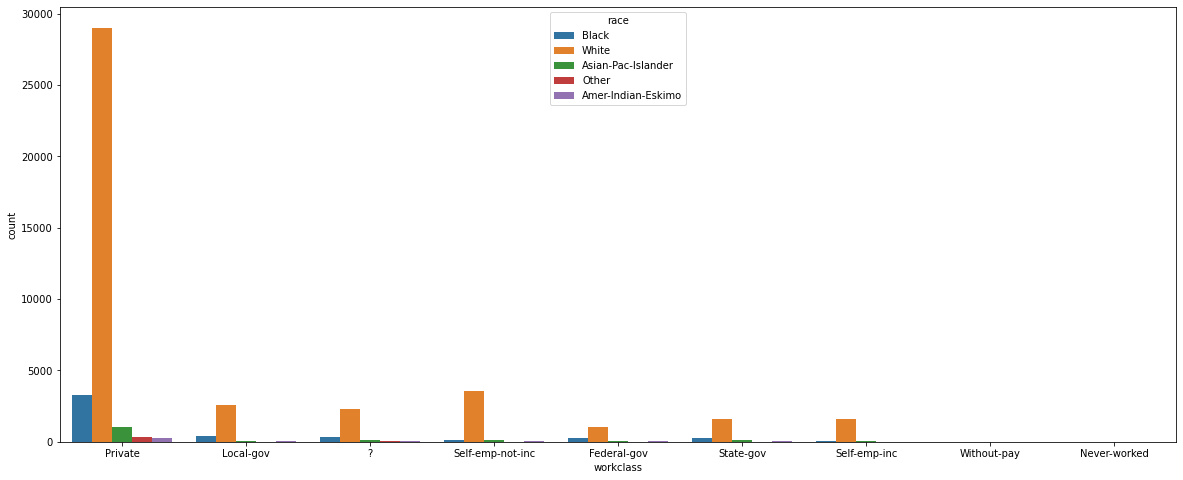

In [52]:
plt.figure(figsize = (20,8))

sns.countplot(df.workclass, hue = df.race)
plt.show()

### Observation - As per the count plot it is clearly seems most no.of white peoples are working in Private sector and in other sectors also

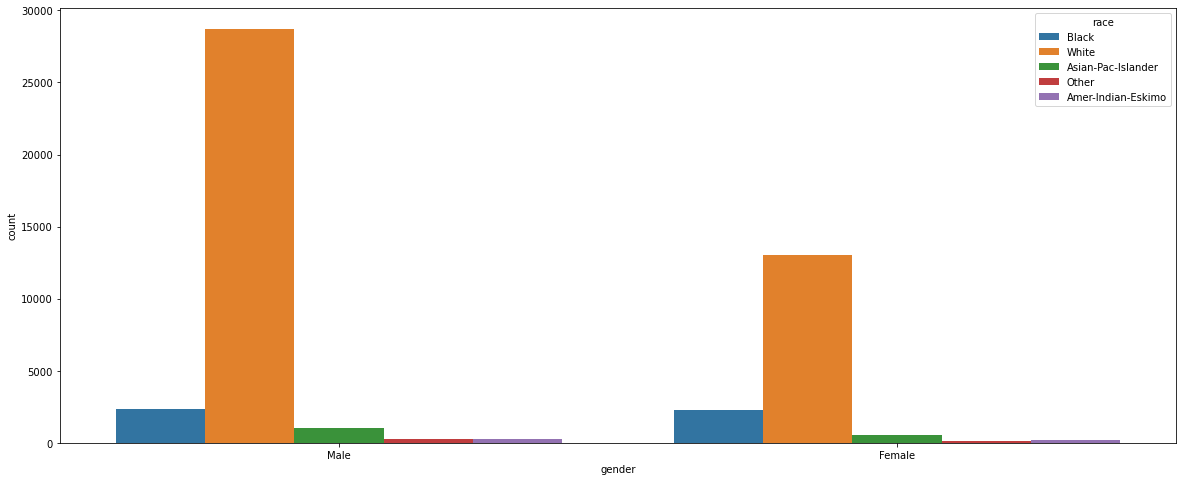

In [53]:
plt.figure(figsize = (20,8))

sns.countplot(df.gender, hue = df.race)
plt.show()

### Observation - As per the count plot it is clearly seems most no.of white peoples are Male

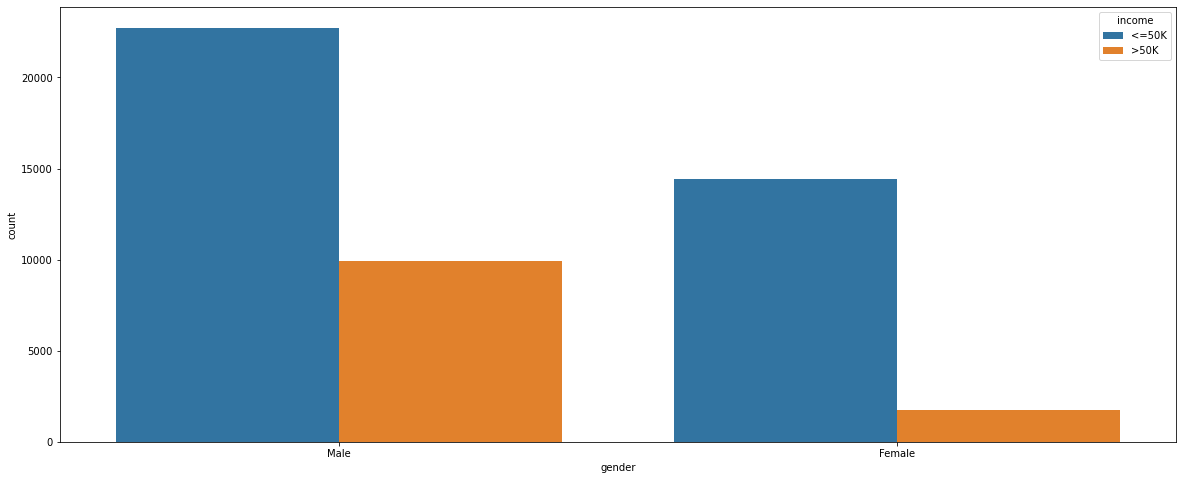

In [54]:
plt.figure(figsize = (20,8))

sns.countplot(df.gender, hue = df.income)
plt.show()

### Observation - As per the count plot it is clearly seems most no.of people(Male and Female) have income less than 50 thousands

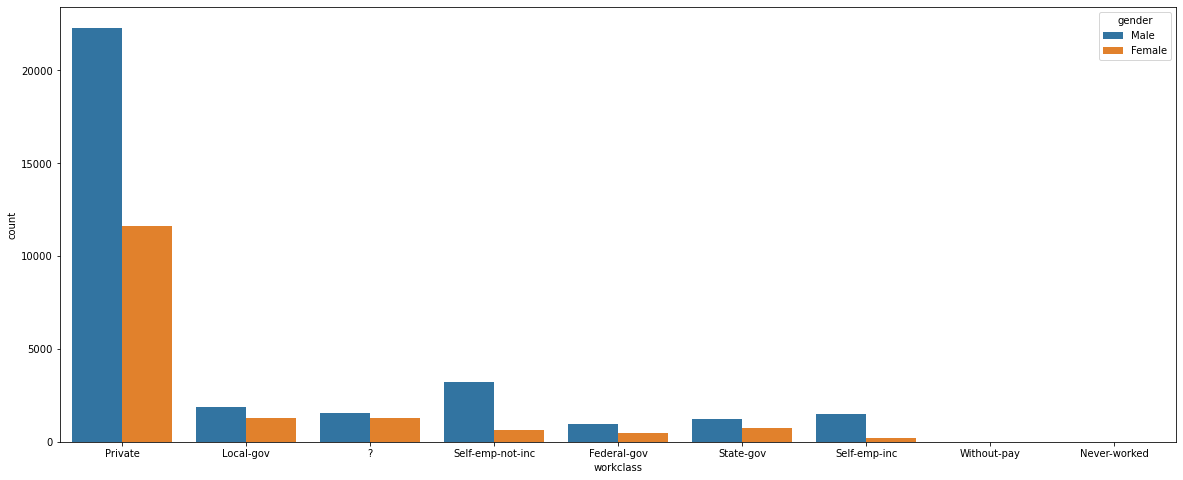

In [55]:
plt.figure(figsize = (20,8))

sns.countplot(df.workclass, hue = df.gender)
plt.show()

### Observation - As per the count plot it seems most no.of male in workclass are more than female

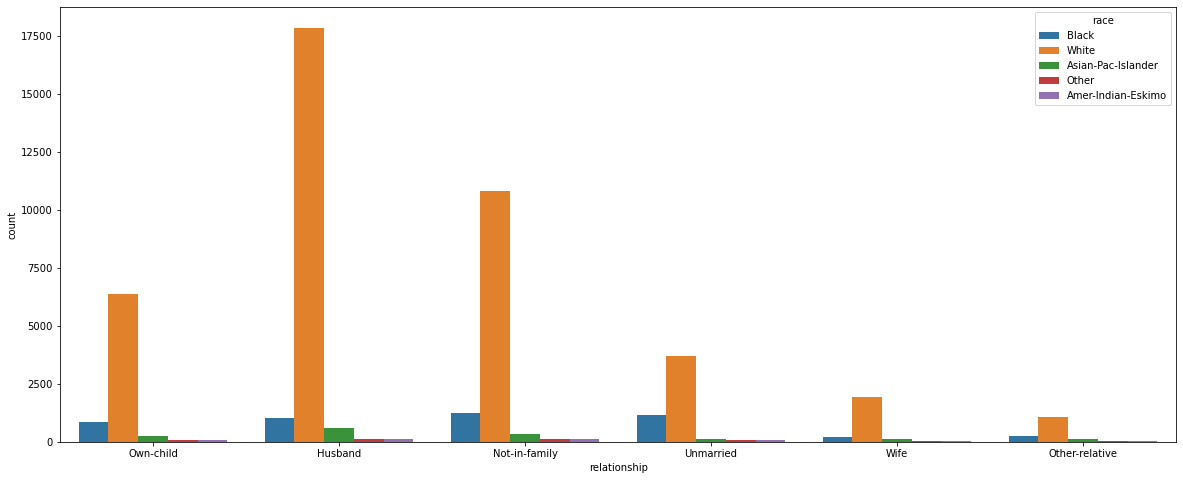

In [56]:
plt.figure(figsize = (20,8))

sns.countplot(df.relationship, hue = df.race)
plt.show()

### Observation - As per the count plot it seems most no.of relationship are white people and most of the husbands are white.

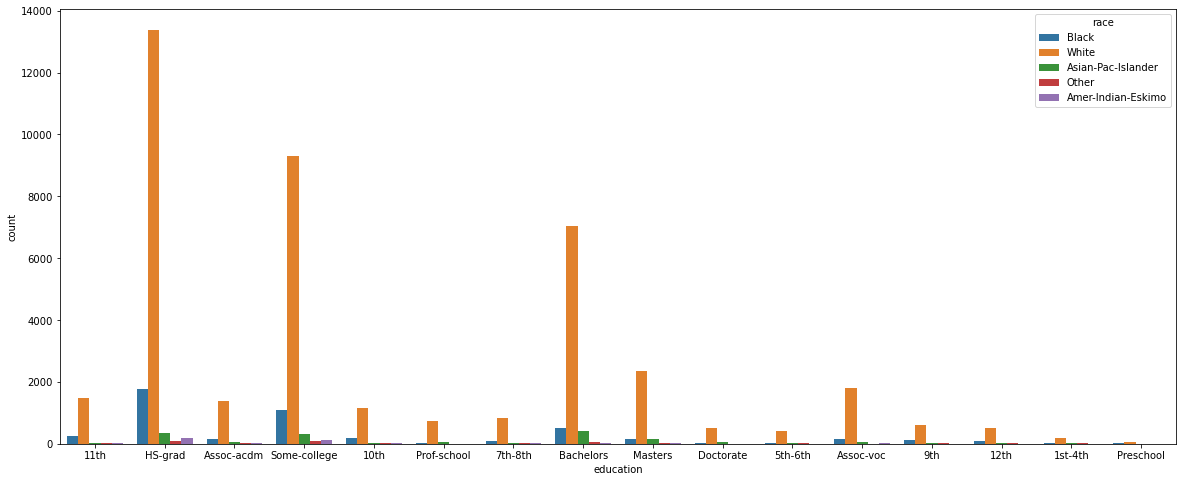

In [57]:
plt.figure(figsize = (20,8))

sns.countplot(df.education, hue = df.race)
plt.show()

### Observation - As per the count plot it seems most of white people have graduted and highest white people garduated in HS-grad

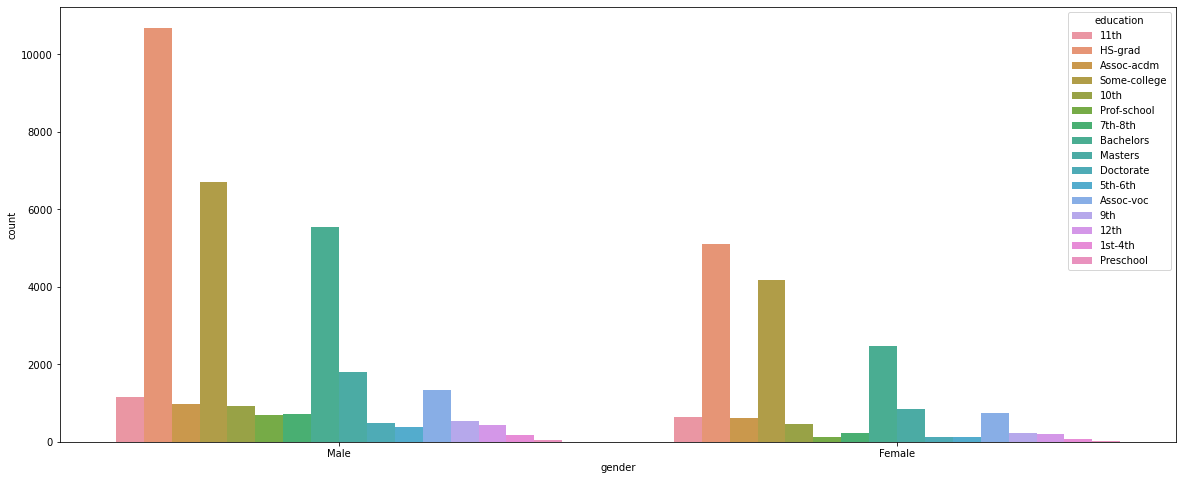

In [58]:
plt.figure(figsize = (20,8))

sns.countplot(df.gender, hue = df.education)
plt.show()

### Observation - As per the count plot it seems most of male have garduated in HS-grad

## Bivariate Analysis of categorical and numericals columns

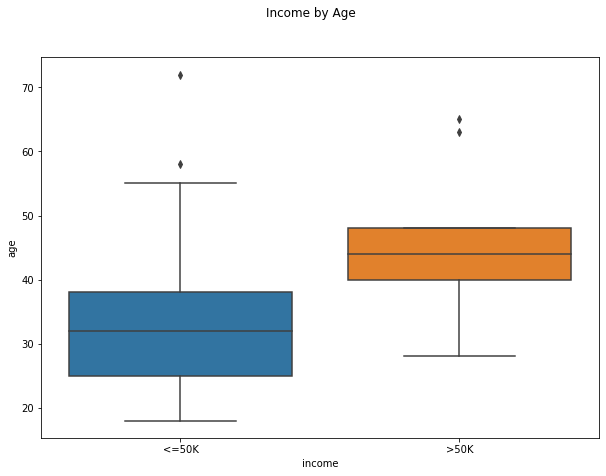

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['income'], y=df['age'].iloc[:30])
plt.suptitle('Income by Age')
plt.show()

### Observation - As per the box plot it seems people have income greater than 50 thousand are younger than people have income less than 50 thousand

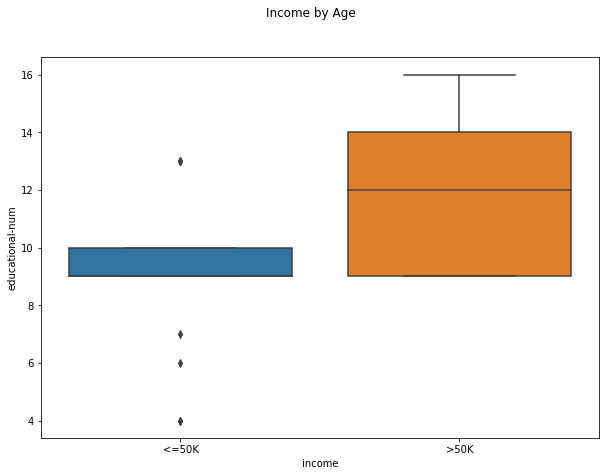

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['income'], y=df['educational-num'].iloc[:30])
plt.suptitle('Income by Age')
plt.show()

### Observation - As per the box plot it seems people have high educational-num have income greater than 50 thousand.

## Step - 5 - In the above steps you might have encountered many missing values and outliers
- Find and treat the outliers and missing values in each column 😥
- Read this Kaggle Notebook and understand various ways to detect andhandle outliers. Try to implement the same. 

### Missing Value Treatment

- As per the observation it is clearly seems there's (?) present in dataset which consider as a missing value

In [61]:
df.isin(['?']).sum() 

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [62]:
from numpy import nan

df = df.replace('?', nan)

In [63]:
## Checking null values

df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

**We Observe that there are missing values in 3 columns: Workclass, Occupation and Native-Country.**

**As all the 3 columns are categorical lets find the mode of the columns and replace it with NaN values.**

In [64]:
# Imputing NaN values with mode

df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace = True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace = True)

In [65]:
## Checking null values

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Observation - As checked there is no missing values present in the dataset

### Outlier Treatment

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


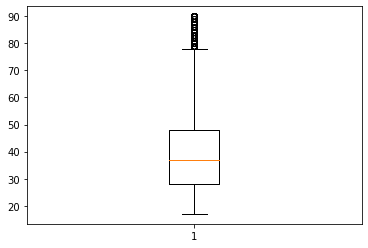

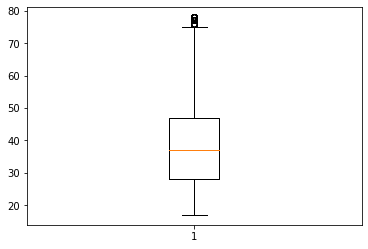

In [67]:
plt.boxplot(df['age'])
plt.show()

def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    
    for x in df[col]:
        if x < lb or x > ub:
            df[col] = df[col].replace(x, np.median(df[col]))
        

outliers(df, "age")        
plt.boxplot(df["age"])
plt.show()

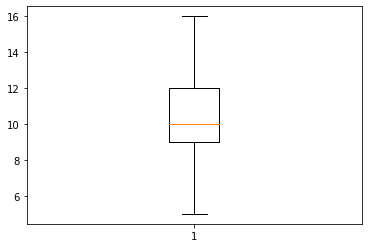

In [68]:
outliers(df, "educational-num")        
plt.boxplot(df["educational-num"])
plt.show()

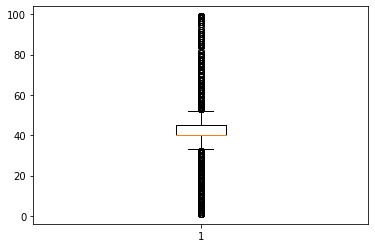

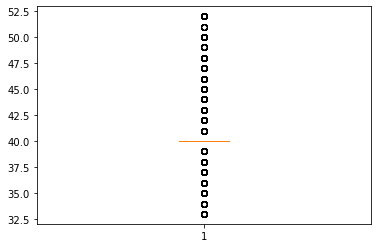

In [69]:
plt.boxplot(df['hours-per-week'])
plt.show()


outliers(df, "hours-per-week")        
plt.boxplot(df["hours-per-week"])
plt.show()

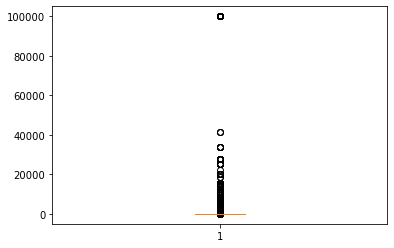

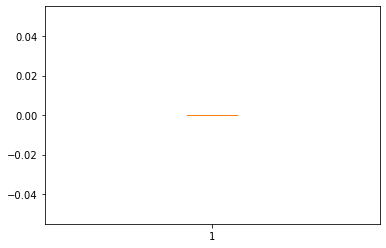

In [70]:
plt.boxplot(df['capital-gain'])
plt.show()


outliers(df, "capital-gain")        
plt.boxplot(df["capital-gain"])
plt.show()

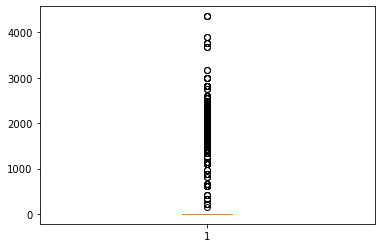

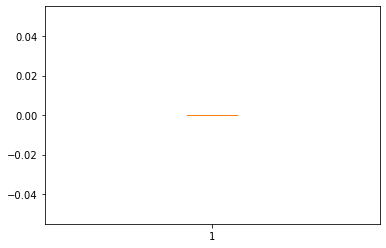

In [71]:
plt.boxplot(df['capital-loss'])
plt.show()


outliers(df, "capital-loss")        
plt.boxplot(df["capital-loss"])
plt.show()

## Step - 6 - Apply appropriate hypothesis tests to verify the below mentioned questions
- Is there a relationship between occupation and gender? (i.e. does the preference of occupation depend on the gender)
- Is there a relationship between gender and income?
- You are free to explore other tests also.

In [72]:
cross_tab = pd.crosstab(df['income'], df['gender'])
cross_tab

gender,Female,Male
income,,
<=50K,14423,22732
>50K,1769,9918


In [73]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(cross_tab)

alpha = 0.05
print("p value = {}".format(p))
if p <= alpha:
    print("{} <= {}".format(p,alpha))
    print("Female income is more than man income. So reject Null Hypothesis")
else:
    print("Female income is more than man income")

p value = 0.0
0.0 <= 0.05
Female income is more than man income. So reject Null Hypothesis


## Step - 7 - Split the data into train and test. After which you need to perform feature transformation:
- For Numerical Features -> Do Column Standardization
- For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.
- You are free to explore other feature transformations.

In [74]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [75]:
df['income'] = df['income'].map({'<=50K':"Less Income", '>50K': "High Income"})

In [76]:
df['income'].value_counts()

Less Income    37155
High Income    11687
Name: income, dtype: int64

### Identifying Target Variable

In [77]:
y = df['income']

X = df.drop('income', axis = 'columns')

In [78]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States


In [79]:
y.head()

0    Less Income
1    Less Income
2    High Income
3    High Income
4    Less Income
Name: income, dtype: object

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (34189, 14) (34189,)
Test Set:  (14653, 14) (14653,)


### Data Preprocessing for Train

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [82]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
3833,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Own-child,White,Female,United-States
34743,Private,10th,Married-civ-spouse,Craft-repair,Own-child,Other,Male,United-States
2022,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
1580,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
4612,Private,HS-grad,Separated,Transport-moving,Unmarried,White,Female,United-States


In [83]:
X_train_num = X_train.select_dtypes(include = ['int64','float64'])
X_train_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
3833,27,131310,10,0,0,40
34743,42,367533,6,0,0,43
2022,32,38158,11,0,0,40
1580,36,148903,10,0,0,40
4612,29,359155,9,0,0,40


In [87]:
# labelencoding to the Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train['workclass'] = le.fit_transform(X_train['workclass'])
X_train['education'] = le.fit_transform(X_train['education'])
X_train['marital-status'] = le.fit_transform(X_train['marital-status'])
X_train['occupation'] = le.fit_transform(X_train['occupation'])
X_train['relationship'] = le.fit_transform(X_train['relationship'])
X_train['race'] = le.fit_transform(X_train['race'])
X_train['gender'] = le.fit_transform(X_train['gender'])
X_train['native-country'] = le.fit_transform(X_train['native-country'])

In [88]:
X_train.shape

(34189, 14)

In [89]:
# Scaling the Numericals Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # z-transform = x-mu/std

# Columns names are converted into the values of columns after OneHotCoding
# Dataframe converted into numpy ndarray


X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
3833,-0.855706,-0.551219,-0.142309,0.0,0.0,-0.324040
34743,0.262159,1.687545,-1.960302,0.0,0.0,0.533525
2022,-0.483084,-1.434052,0.312189,0.0,0.0,-0.324040
1580,-0.184987,-0.384485,-0.142309,0.0,0.0,-0.324040
4612,-0.706657,1.608144,-0.596807,0.0,0.0,-0.324040


In [90]:
X_train_num_rescaled.shape

(34189, 6)

In [91]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train], axis = 1)

X_train_transformed.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
3833,-0.855706,-0.551219,-0.142309,0.0,0.0,-0.324040,27,1,131310,15,10,2,0,3,4,0,0,0,40,38
34743,0.262159,1.687545,-1.960302,0.0,0.0,0.533525,42,3,367533,0,6,2,2,3,3,1,0,0,43,38
2022,-0.483084,-1.434052,0.312189,0.0,0.0,-0.324040,32,5,38158,8,11,2,4,0,4,1,0,0,40,38
1580,-0.184987,-0.384485,-0.142309,0.0,0.0,-0.324040,36,3,148903,15,10,4,3,1,4,0,0,0,40,38
4612,-0.706657,1.608144,-0.596807,0.0,0.0,-0.324040,29,3,359155,11,9,5,13,4,4,0,0,0,40,38


In [92]:
X_train_transformed.shape

(34189, 20)

### Data Preprocessing for Test

In [93]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
38113,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
39214,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
44248,Private,Masters,Divorced,Sales,Not-in-family,White,Male,United-States
10283,Self-emp-not-inc,5th-6th,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
26724,Self-emp-not-inc,10th,Never-married,Other-service,Own-child,White,Female,United-States


In [94]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
38113,36,65624,13,0,0,40
39214,57,37345,15,0,0,36
44248,49,287647,14,0,0,45
10283,54,183668,10,0,0,40
26724,17,228786,6,0,0,40


In [95]:
# labelencoding to the Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_test['workclass'] = le.fit_transform(X_test['workclass'])
X_test['education'] = le.fit_transform(X_test['education'])
X_test['marital-status'] = le.fit_transform(X_test['marital-status'])
X_test['occupation'] = le.fit_transform(X_test['occupation'])
X_test['relationship'] = le.fit_transform(X_test['relationship'])
X_test['race'] = le.fit_transform(X_test['race'])
X_test['gender'] = le.fit_transform(X_test['gender'])
X_test['native-country'] = le.fit_transform(X_test['native-country'])

In [96]:
X_test.shape

(14653, 14)

In [97]:
# Scaling the Numericals Features for test

X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
38113,-0.184987,-1.173748,1.221186,0.0,0.0,-0.324040
39214,1.380025,-1.441757,2.130182,0.0,0.0,-1.467460
44248,0.783830,0.930439,1.675684,0.0,0.0,1.105235
10283,1.156452,-0.055005,-0.142309,0.0,0.0,-0.324040
26724,-1.600950,0.372593,-1.960302,0.0,0.0,-0.324040


In [98]:
X_test_num_rescaled.shape

(14653, 6)

In [99]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test], axis=1)

X_test_transformed.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
38113,-0.184987,-1.173748,1.221186,0.0,0.0,-0.324040,36,3,65624,9,13,4,9,1,4,1,0,0,40,37
39214,1.380025,-1.441757,2.130182,0.0,0.0,-1.467460,57,4,37345,14,15,2,9,0,4,1,0,0,36,37
44248,0.783830,0.930439,1.675684,0.0,0.0,1.105235,49,3,287647,12,14,0,11,1,4,1,0,0,45,37
10283,1.156452,-0.055005,-0.142309,0.0,0.0,-0.324040,54,5,183668,4,10,2,4,0,4,1,0,0,40,37
26724,-1.600950,0.372593,-1.960302,0.0,0.0,-0.324040,17,5,228786,0,6,4,7,3,4,0,0,0,40,37


In [100]:
X_test_transformed.shape

(14653, 20)

## Step - 8 - Build various Machine Learning models considering ‘income’ as target variable. Also make sure to perform Hyperparameter tuning to avoid Overfitting of models.


In [101]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

### 1. KNN classifier

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_transformed,y_train)

y_test_pred = knn.predict(X_test_transformed)

y_train_pred = knn.predict(X_train_transformed)

knn_ac_test = accuracy_score(y_test, y_test_pred)

ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", ac_train)
print("Test Accuracy ", knn_ac_test)



Training Accuracy :  0.805171253912077
Test Accuracy  0.7233331058486316


### 2. Logestic Regresion

In [144]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_transformed,y_train)

y_test_pred = lr.predict(X_test_transformed)

y_train_pred = lr.predict(X_train_transformed)

lr_ac_test = accuracy_score(y_test, y_test_pred)

ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", ac_train)
print("Test Accuracy ", lr_ac_test)

Training Accuracy :  0.7609757524349937
Test Accuracy  0.7601173821060534


### 3. Support Vector Machine

In [145]:
from sklearn.svm import SVC

svm = SVC(C=0.1, kernel='rbf')

svm.fit(X_train_transformed,y_train)

y_test_pred = svm.predict(X_test_transformed)

y_train_pred = svm.predict(X_train_transformed)

svm_ac_test = accuracy_score(y_test, y_test_pred)

ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", ac_train)
print("Test Accuracy ", svm_ac_test)

Training Accuracy :  0.7609757524349937
Test Accuracy  0.7601173821060534


### 4. Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train_transformed,y_train)

y_test_pred = dt.predict(X_test_transformed)

y_train_pred = dt.predict(X_train_transformed)

dt_ac_test = accuracy_score(y_test, y_test_pred)

ac_train = accuracy_score(y_train, y_train_pred)

print("****************************************************")
print("Training Accuracy : ", ac_train)
print("Test Accuracy ", dt_ac_test)
print("****************************************************")


****************************************************
Training Accuracy :  0.8575857732019071
Test Accuracy  0.8237221046884597
****************************************************


### 5. Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train_transformed,y_train)

y_test_pred = rf.predict(X_test_transformed)

y_train_pred = rf.predict(X_train_transformed)

rf_ac_test = accuracy_score(y_test, y_test_pred)

ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", ac_train)
print("Test Accuracy ", rf_ac_test)

Training Accuracy :  0.9998245049577349
Test Accuracy  0.819149662185218


### 6. XG Boosting

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier()

gdb.fit(X_train_transformed,y_train)

y_test_pred = gdb.predict(X_test_transformed)

y_train_pred = gdb.predict(X_train_transformed)

gdb_ac_test = accuracy_score(y_test, y_test_pred)

ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", ac_train)
print("Test Accuracy ", gdb_ac_test)

Training Accuracy :  0.8431951797361724
Test Accuracy  0.8368934689142156


In [149]:
x = {'K Nearest Neighbour': knn_ac_test, 'Logistic Regression' : lr_ac_test, 'Support Vector Machine' : svm_ac_test,'Decision tree' : lr_ac_test, 'Random Forest' : rf_ac_test,'Gradient Boostinge':gdb_ac_test}

x

{'K Nearest Neighbour': 0.7233331058486316,
 'Logistic Regression': 0.7601173821060534,
 'Support Vector Machine': 0.7601173821060534,
 'Decision tree': 0.7601173821060534,
 'Random Forest': 0.819149662185218,
 'Gradient Boostinge': 0.8368934689142156}

In [152]:
accuracy = pd.DataFrame.from_dict(x, orient='index',columns=['accuracy'])

accuracy

,accuracy
K Nearest Neighbour,0.723333
Logistic Regression,0.760117
Support Vector Machine,0.760117
Decision tree,0.760117
Random Forest,0.819150
Gradient Boostinge,0.836893


In [156]:
accuracy.index

Index(['K Nearest Neighbour', 'Logistic Regression', 'Support Vector Machine',
       'Decision tree', 'Random Forest', 'Gradient Boostinge'],
      dtype='object')

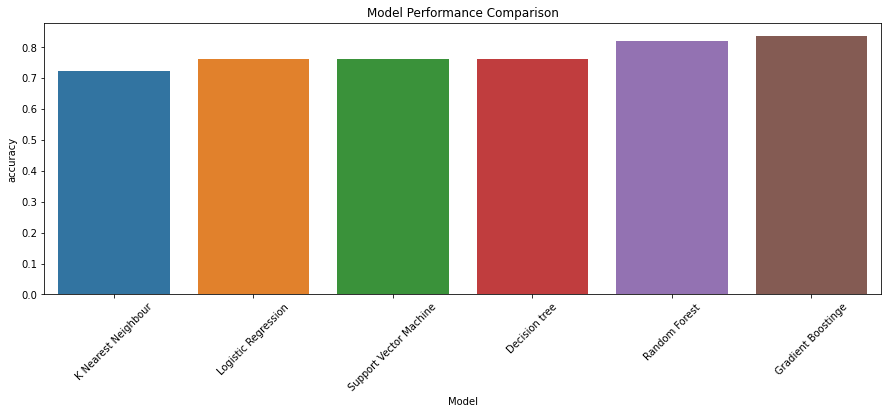

In [159]:
plt.figure(figsize=(15,5))

sns.barplot(x = accuracy.index , y = accuracy['accuracy'])

plt.title('Model Performance Comparison')

plt.xlabel('Model')

plt.xticks(rotation=45)

plt.show()